## Estadística Aplicada

Tercer examen parcial

Karla Mariana Ley Acero 2076201

Grupo 42

In [54]:
## Librerias básicas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [55]:
## Librerias especializadas

from statsmodels.tsa.seasonal import seasonal_decompose

## Tamaño de gráficas (largo, alto)

plt.rcParams['figure.figsize'] = (10, 6)

Has sido contratado como asesor del director de Metrorrey, la empresa encargada de 
administrar el metro en el área metropolitana de Monterrey, NL.

El director te ha proporcionado la siguiente base de datos con la información mensual 
del número de pasajeros y el ingreso generado por pasajes.

In [56]:
## Leer base de datos

pasajeros = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/datos_metrorrey.csv')

Responde lo que se pide:
1. Muestre de que tipo son las variables del dataframe, revise que no haya missing 
values (de haberlos imputar valores). Cersiorarse que exista una variable fecha, 
que sea el index y tenga una frecuencia asignada (1.8 puntos)

In [57]:
pasajeros.head()

,mes,miles de pasajeros,ingresos (miles de pesos)
0,1995/01,3439.0,3240.0
1,1995/02,2879.0,3623.0
2,1995/03,3103.0,3990.0
3,1995/04,3491.0,3321.0
4,1995/05,3109.0,3777.0


In [58]:
# Tipos de variables en el dataframe 

pasajeros.dtypes

mes                           object
miles de pasajeros           float64
ingresos (miles de pesos)    float64
dtype: object

In [59]:
# Verificar que NO hayan missing values


pasajeros.isnull().sum()

mes                          0
miles de pasajeros           0
ingresos (miles de pesos)    0
dtype: int64

No hay ningún missing value en ninguna de las variables

Modificaciones al dataframe

In [60]:
### PASOS A SEGUIR

## 1. Formato fecha (meses)
pasajeros['mes'] = pd.to_datetime(pasajeros['mes'], format='%Y/%m')
pasajeros.head()

,mes,miles de pasajeros,ingresos (miles de pesos)
0,1995-01-01,3439.0,3240.0
1,1995-02-01,2879.0,3623.0
2,1995-03-01,3103.0,3990.0
3,1995-04-01,3491.0,3321.0
4,1995-05-01,3109.0,3777.0


In [61]:
## 2. Fecha sea el index
pasajeros = pasajeros.set_index('mes')
pasajeros.head()

,miles de pasajeros,ingresos (miles de pesos)
mes,,
1995-01-01,3439.0,3240.0
1995-02-01,2879.0,3623.0
1995-03-01,3103.0,3990.0
1995-04-01,3491.0,3321.0
1995-05-01,3109.0,3777.0


In [62]:
# Asignar una frecuencia

pasajeros.asfreq('MS')

,miles de pasajeros,ingresos (miles de pesos)
mes,,
1995-01-01,3439.000,3240.000
1995-02-01,2879.000,3623.000
1995-03-01,3103.000,3990.000
1995-04-01,3491.000,3321.000
1995-05-01,3109.000,3777.000
...,...,...
2023-04-01,9523.669,38799.657
2023-05-01,11891.646,58511.798
2023-06-01,10657.712,55684.063


In [63]:
pasajeros.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01'],
              dtype='datetime64[ns]', name='mes', length=344, freq=None)

2. Análisis exploratorio. Utilizando código de Python genera un print() para cada 
una de la siguiente información (8 puntos):


**a)** Rango de fechas

In [64]:
print(f'El rango de fechas del dataframe pasajeros es del {pasajeros.index.min()} al {pasajeros.index.max()}')

El rango de fechas del dataframe pasajeros es del 1995-01-01 00:00:00 al 2023-08-01 00:00:00


**b)** Número de observaciones


In [65]:
#Forma 1
print(f'El número de observaciones en el dataframe de pasajeros es de {len(pasajeros)}')

El número de observaciones en el dataframe de pasajeros es de 344


In [66]:
#Forma 2
print(f'El número de observaciones en el dataframe de pasajeros es de {pasajeros["miles de pasajeros"].count()}')

El número de observaciones en el dataframe de pasajeros es de 344


**c)** Valor mínimo y valor máximo del número de pasajeros

In [67]:
print(f'El valor mímino de número de pasajeros es de {pasajeros["miles de pasajeros"].min()} y el máximo es de {pasajeros["miles de pasajeros"].max()}')

El valor mímino de número de pasajeros es de 2397.0 y el máximo es de 17534.523


3. Grafica lo siguiente (8.2 puntos):

**a)** La serie de miles de pasajeros

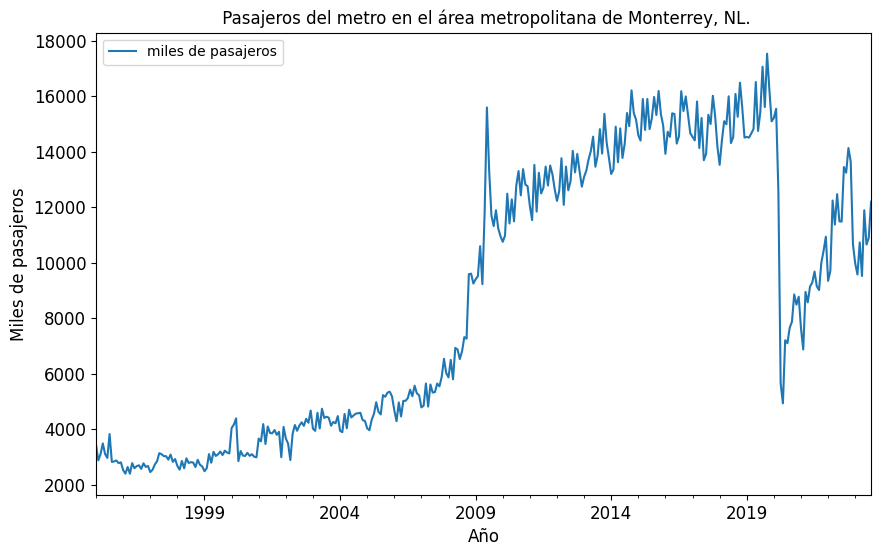

In [68]:
pasajeros['miles de pasajeros'].plot()
plt.title(' Pasajeros del metro en el área metropolitana de Monterrey, NL.')
plt.ylabel('Miles de pasajeros')
plt.xlabel('Año')
plt.legend();

**b)** Una media móvil centrada a 6 meses, y explica si la serie tiene tendencia 
o no, y si existen ciclos (subidas y caídas) y que se debe cada uno.

In [69]:
pasajeros['media_movil'] = pasajeros['miles de pasajeros'].rolling(window=7, center=True).mean()

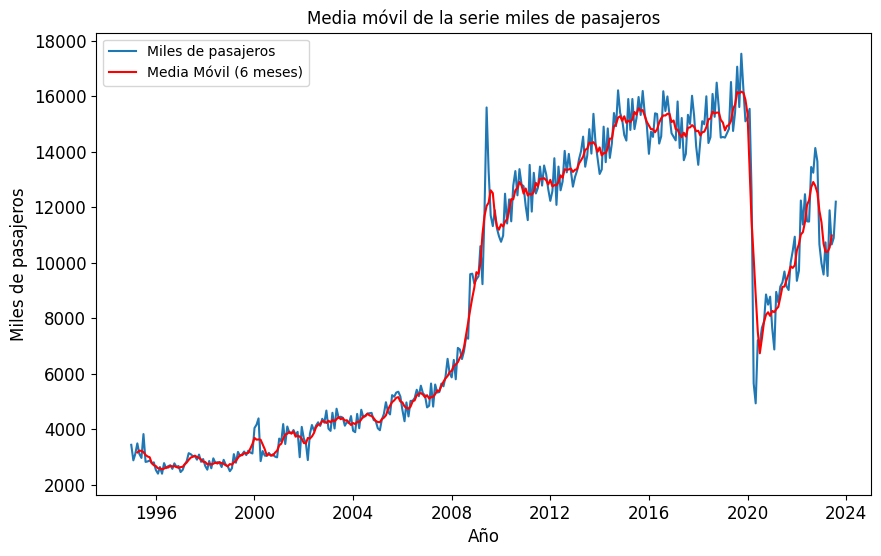

In [70]:
plt.plot(pasajeros['miles de pasajeros'], label='Miles de pasajeros')
plt.title('Media móvil de la serie miles de pasajeros')
plt.plot(pasajeros['media_movil'], label='Media Móvil', color='red')
plt.ylabel('Miles de pasajeros')
plt.xlabel('Año')
plt.legend();

**4.** El director de Metrorrey planea hacer mantenimiento a las estaciones y los 
vagones, pero no sabe la fecha adecuada para hacerlo. Utiliza el modelo ETS 
para obtener el componente estacional de la serie y señala el mes o meses 
adecuados para dar mantenimiento (8.2 puntos)

In [71]:
ets1 = seasonal_decompose(pasajeros['miles de pasajeros'], model = 'mult') 

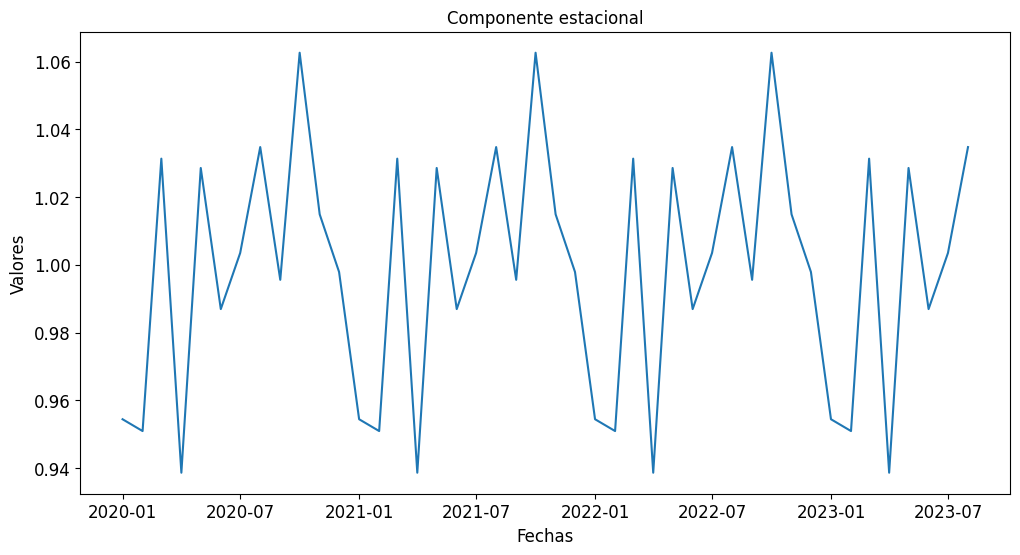

In [121]:
## Estacional
start_date = '2020-01-01'
end_date = '2023-08-01'

sub = ets1.seasonal[start_date:end_date]

plt.figure(figsize=(12, 6))
plt.plot(sub)
plt.title('Componente estacional')
plt.xlabel('Fechas')
plt.ylabel('Valores')
plt.show()

Se observa en el gráfico anterior del componente estacional que el período de Semana Santa muestra una disminución en la afluencia en el metro, ya que las personas se toman vacaciones, no asisten al trabajo o la escuela. Esto lo convierte en un momento adecuado para realizar el mantenimiento necesario.

**5.** El director de Metrorrey quiere saber los ingresos por pasaje y el número de 
pasajeros los siguientes 5 meses. Utiliza el método de Holt-Winters para 
pronosticar el número de pasajeros los próximos 5 meses, cada pronóstico 
multiplícalo por $7.1 para tener un estimado de los ingresos (8.2 puntos). 

In [110]:
import statsmodels.api as sm

In [112]:
modelo = sm.tsa.ExponentialSmoothing(pasajeros['miles de pasajeros'], seasonal='add', seasonal_periods=12)
modelo_fit = modelo.fit()

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [113]:
pasajeros_pronostico = modelo_fit.forecast(steps=5)
ingresos_pas = pasajeros_pronostico * 7.1

In [117]:
print("El pronóstico de pasajeros para los próximos 5 meses es de:\n", pasajeros_pronostico)
print("El ingreso estimado de los próximos 5 meses es de:\n", ingresos_pas)

El pronóstico de pasajeros para los próximos 5 meses es de:
 2023-09-01    11532.223045
2023-10-01    12305.606260
2023-11-01    11607.822970
2023-12-01    11098.028687
2024-01-01    10895.852264
Freq: MS, dtype: float64
El ingreso estimado de los próximos 5 meses es de:
 2023-09-01    81878.783622
2023-10-01    87369.804446
2023-11-01    82415.543087
2023-12-01    78796.003681
2024-01-01    77360.551077
Freq: MS, dtype: float64


6. Realiza un pronóstico de los miles de pasajeros con el modelo ARIMA 
cumpliendo los siguientes pasos:


In [77]:
### Librerías especializadas

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

### Importar el modelo ARIMA

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

### Definir el tamaño de la gráfica

plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12

**a)** Realiza una prueba de raíz unitaria a la serie original (8.2 puntos)

Prueba de dickey-fuller aumentada

    Ho: Serie No estacionaria
    Ha: Serie estacionaria

**Regla de decisión** 

pvalue< alpha Rechazamos Ho

In [78]:
prueba_DFA = adfuller(pasajeros['miles de pasajeros'])
pvalue = prueba_DFA[1]
pvalue.round(2)

0.58

El p-value es de 0.58, por lo tanto no se rechaza H0. pasajeros['miles de pasajeros'] es una serie ***no estacionaria***

**b)** En caso de que no sea estacionaria aplica primeras diferencias, y realiza 
la prueba de raíz unitaria para verificar que la serie sea estacionaria (8.2 
puntos)

$$ \Delta_t = Y_t - Y_{t-1} $$

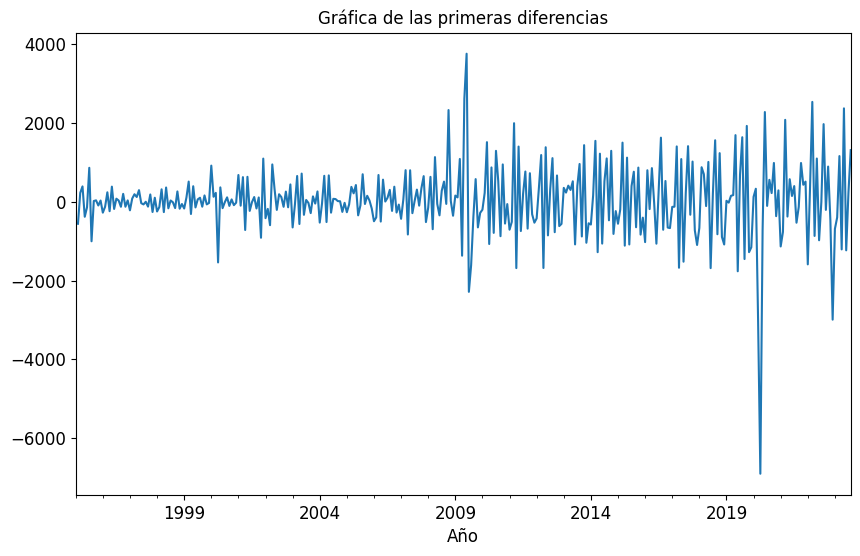

In [79]:
pasajeros['diferencia'] = pasajeros['miles de pasajeros'].diff()
plt.title('Gráfica de las primeras diferencias')
pasajeros['diferencia'].plot()
plt.xlabel('Año')
plt.show()

De la gráfica se aprecia que existe un problema de varianza 

In [80]:
## Prueba de dickey-fuller aumentada para las primeras diferencias 

## Hay que indicar que ignore el missing value = .dropna

prueba_DFA1 = adfuller(pasajeros['diferencia'].dropna())
pvalue1 = prueba_DFA1[1]
pvalue1.round(2)

0.0

El p-value = 0.0 rechazamos Ho, las primeras diferencias son una serie estacionaria 

* IMCMI Integrada I(1) = ARIMA (p.1,q)
* Primeras diferencias de IMCMI I(0) = ARIMA (p,0,q)

**c)** Si la serie no es estacionaria repite el paso b hasta que la serie sea estacionaria.

Ya se confirmó que si es estacionaria, por lo que ese paso se omite

**d)** Realiza las graficas de autocorrelación de la serie estacionaria para 
verificar si la serie tiene o no un componente estacional (8.2 puntos)

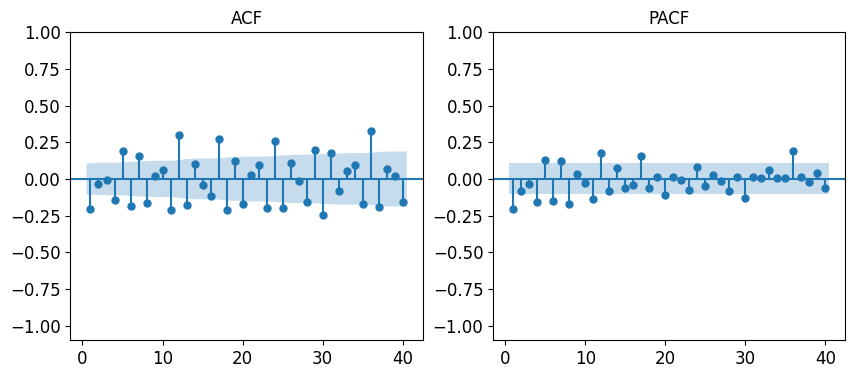

In [81]:
# Graficas de autocorrelacion
ig,ax=plt.subplots(1,2,figsize=(10,4))
# 1
plot_acf(pasajeros['diferencia'].dropna(),zero=False,lags=40,ax=ax[0],title='ACF')
ax[0].set_ylim(-1.1)
# 2
plot_pacf(pasajeros['diferencia'].dropna(),zero=False,lags=40,ax=ax[1],title='PACF')
ax[1].set_ylim(-1.1)
plt.show()

De la gráfica podemos apreciar que existe un patrón, por lo cual es una serie con componente estacional 

**e)** Utiliza auto_arima para encontrar el orden del modelo arima, dando el 
parámetro information_criterion prueba y muestra el resultado, con aic, 
bic, hqic, oob, en caso de que resulten diferente elegir aic si tu matricula 
termina en par, sino termina en par elegir uno distinto a aic. (8.2 puntos)


In [82]:
## Importamos pmdarima
import pmdarima as pm

In [84]:
# Primero encontrar el SARIMA con la función auto_arima 

pm.auto_arima(pasajeros['miles de pasajeros'],
              ## Encontrar lo de la ARIMA normal (minusculas)
              start_p=1,
              start_q=1,
              m=12,
              max_p=7,
              max_q=7,
              ic='aic'
              ## Parte estacional
              seasonal= True,
              #Orden estacional
              start_P=1,
              start_Q=1,
              max_P=12,
              max_Q=12,)

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [87]:
pm.auto_arima(pasajeros['miles de pasajeros'],
              ## Encontrar lo de la ARIMA normal (minusculas)
              start_p=1,
              start_q=1,
              m=12,
              max_p=7,
              max_q=7,
              ic='bic',
              ## Parte estacional
              seasonal= True,
              #Orden estacional
              start_P=1,
              start_Q=1,
              max_P=12,
              max_Q=12,)

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [89]:
pm.auto_arima(pasajeros['miles de pasajeros'],
              ## Encontrar lo de la ARIMA normal (minusculas)
              start_p=1,
              start_q=1,
              m=12,
              max_p=7,
              max_q=7,
              ic='hqic',
              ## Parte estacional
              seasonal= True,
              #Orden estacional
              start_P=1,
              start_Q=1,
              max_P=12,
              max_Q=12,)

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [90]:
pm.auto_arima(pasajeros['miles de pasajeros'],
              ## Encontrar lo de la ARIMA normal (minusculas)
              start_p=1,
              start_q=1,
              m=12,
              max_p=7,
              max_q=7,
              ic='oob',
              ## Parte estacional
              seasonal= True,
              #Orden estacional
              start_P=1,
              start_Q=1,
              max_P=12,
              max_Q=12,)

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

El orden de los modelos es el mismo en los 4 casos. Mi matricula es impar, escogeré el modelo BIC (que es el mismo que el AIC)

**f)** Con el orden del modelo arima obtenido estima el modelo arima (8.2 
puntos)

In [91]:
## Estimar el modelo 
model = ARIMA(pasajeros['miles de pasajeros'], order=(1,1,3), seasonal_order=(1,0,1,12))
results = model.fit()
print(results.summary())

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Usuario\App

                                     SARIMAX Results                                      
Dep. Variable:                 miles de pasajeros   No. Observations:                  344
Model:             ARIMA(1, 1, 3)x(1, 0, [1], 12)   Log Likelihood               -2772.716
Date:                            Sat, 04 Nov 2023   AIC                           5559.433
Time:                                    15:34:59   BIC                           5586.297
Sample:                                01-01-1995   HQIC                          5570.134
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9508      0.037    -25.528      0.000      -1.024      -0.878
ma.L1          0.9126      0.050   

**g)** Realiza la gráfica del pronóstico a 5 meses con los intervalos de confianza 
y la serie original desde 2021 (8.2 puntos)

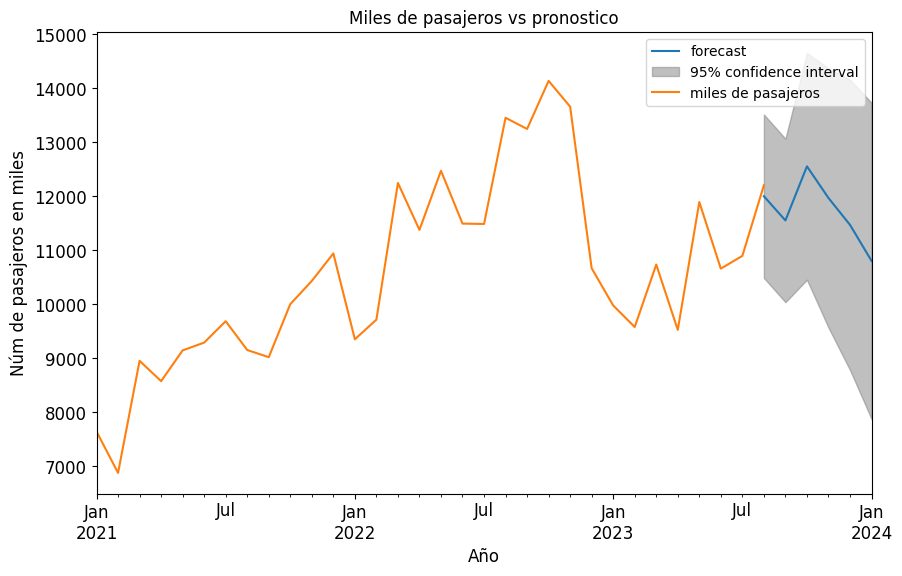

In [100]:
## grafica del pronostico futuro
serie_original = pasajeros['2021-01-01':]
plot_predict(results, '2023-08-01', '2024-01-01')
serie_original['miles de pasajeros'].plot(figsize=(10,6));
plt.title('Miles de pasajeros vs pronostico')
plt.xlabel('Año')
plt.ylabel('Núm de pasajeros en miles')
plt.legend()
plt.show()

**h)** Realiza el pronostico a 5 meses con los intervalos de confianza (8.2 
puntos)

In [93]:
forecast = results.get_forecast(steps=5)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

In [94]:
inicio = '2023-09-01'
fin = '2024-01-01'

In [95]:
pronostico_valor = forecast_mean[inicio:fin]
pronostico_intervalos = forecast_ci.loc[inicio:fin]

In [96]:
pronostico = pd. DataFrame({
    'pronóstico': pronostico_valor,
    'limite inferior': pronostico_intervalos.iloc[:,0],
    'limite superior': pronostico_intervalos.iloc[:,1]
})

In [97]:
pronostico

,pronóstico,limite inferior,limite superior
2023-09-01,11550.767744,10036.862482,13064.673007
2023-10-01,12552.862921,10452.326416,14653.399426
2023-11-01,11966.538314,9565.883914,14367.192713
2023-12-01,11468.971711,8781.119154,14156.824267
2024-01-01,10801.939327,7872.642940,13731.235713


**i)** Calcula los ingresos y el intervalo de los ingreso multiplicando por $7.1
(8.2 puntos)

In [108]:
precio_pasaje = 7.1

ingresos = pronostico * precio_pasaje
print("Ingresos e intervalo estimados para los próximos 5 meses:  \n", ingresos)


Ingresos e intervalo estimados para los próximos 5 meses:  
               pronóstico  limite inferior  limite superior
2023-09-01  82010.450985     71261.723622     92759.178348
2023-10-01  89125.326740     74211.517555    104039.135924
2023-11-01  84962.422026     67917.775790    102007.068263
2023-12-01  81429.699148     62345.945997    100513.452299
2024-01-01  76693.769219     55895.764872     97491.773565
